**1. We perform best subset, forward stepwise, and backward stepwise selection on a single data set. For each approach, we obtain $p + 1$ models, containing 0, 1, 2, . . . , p predictors. Explain your answers:**

**(b) Which of the three models with k predictors has the smallest test RSS?**

Among best subset selection, forward stepwise selection, and backward stepwise selection, the best subset selection method will always yield the model with the lowest training RSS for any given number of predictors k. This is because best subset selection evaluates all possible combinations of k predictors and selects the one that minimizes the residual sum of squares. In contrast, forward and backward stepwise selection are greedy algorithms that consider only a subset of possible models, so they might not find the optimal one for each k. However, it's worth noting that for small values of k (like k = 1), or for k = p (all predictors included), the models produced by all three methods will be the same, resulting in equal training RSS.

**(b) Which of the three models with k predictors has the smallest test RSS?**

Unlike training RSS, test RSS is influenced not only by model complexity but also by how well the model generalizes to unseen data. While best subset selection always gives the lowest training RSS, it does not guarantee the smallest test RSS. In fact, because it evaluates many models, it may be more prone to overfitting, especially when k is large.

In practice, the model with the lowest test RSS depends on the true underlying relationship in the data and how well each method approximates it. If cross-validation or a validation set is used to select the best model (i.e., the optimal k), best subset selection often performs slightly better due to its exhaustive search. However, the differences are often small, and forward or backward stepwise selection may yield nearly identical test performance with far lower computational cost.

So, while we cannot say definitively which method will always have the smallest test RSS for a given k, best subset selection has the potential to do so, especially when combined with proper model selection techniques like cross-validation.

**(c) True or False:**

**i. The predictors in the k-variable model identified by forward stepwise are a subset of the predictors in the $(k +1)$-variable model identified by forward stepwise selection.** True. Forward stepwise selection builds models sequentially by adding one predictor at a time. Therefore, the (k + 1)-variable model always contains all predictors from the k-variable model, plus one additional predictor that yields the greatest improvement in model fit.

**ii. The predictors in the k-variable model identified by backward stepwise are a subset of the predictors in the $(k + 1)$-variable model identified by backward stepwise selection.**  True. Backward stepwise selection starts from the full model and removes predictors one at a time. The k-variable model is obtained by dropping one predictor from the (k + 1)-variable model. Thus, the k-variable predictor set is always a subset of the (k + 1)-variable one.

**iii. The predictors in the k-variable model identified by backward stepwise are a subset of the predictors in the $(k + 1)$-variable model identified by forward stepwise selection.** False. Forward and backward stepwise selection follow different search paths and are not guaranteed to select nested models. For example, suppose we have three predictors: A, B, and C. Forward stepwise might choose C first because it has the highest individual explanatory power. It then adds B, and finally A. Meanwhile, backward stepwise starts with all three predictors and may drop A first, finding that B and C together explain the response better due to multicollinearity. Thus, the k-predictor model from backward stepwise (e.g., B and C) is not necessarily a subset of the (k + 1)-predictor model from forward stepwise (e.g., A, B, C). The two approaches explore different sets of models and can yield very different results.

**iv. The predictors in the k-variable model identified by forward stepwise are a subset of the predictors in the $(k +1)$-variable model identified by backward stepwise selection.** False. The same logic applies here.

**v. The predictors in the $k$-variable model identified by best subset are a subset of the predictors in the $(k + 1)$-variable model identified by best subset selection.** False. Best subset selection does not guarantee that the predictors selected for k predictors will be contained in the optimal model with (k + 1) predictors. Since best subset selection searches over all possible combinations of predictors for each value of k, it can produce models that are not nested. For example, the best 3-variable model might include predictors A, B, and C, but the best 4-variable model could be entirely different, say D, E, F, and G, if that combination provides better predictive performance. This non-nested nature is one of the main distinctions between best subset and stepwise selection methods.

**2. For parts (a) through (c), indicate which of i. through iv. is correct. Justify your answer.**

**(a) The lasso, relative to least squares, is:** Less flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance.

The lasso adds an $L_1$​ penalty to the least squares loss function, which has the effect of shrinking some coefficients exactly to zero. This effectively reduces model complexity and can be seen as a form of variable selection. Because it restricts the set of models the algorithm can choose from, it is less flexible than ordinary least squares. However, this reduction in flexibility often leads to lower variance, particularly when predictors are correlated or the number of predictors is large. If the increase in bias (due to the shrinkage) is smaller than the reduction in variance, the overall prediction error will improve.

**(b) Ridge regression, relative to least squares, is:** Less flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance.

Ridge regression adds an $L_2$​ penalty, shrinking the coefficients toward zero but never exactly to zero. Like the lasso, it reduces the model’s flexibility by penalizing large coefficients, which tends to reduce variance, especially in the presence of multicollinearity. However, ridge regression does introduce bias by shrinking the coefficients. The trade-off again is that if the reduction in variance outweighs the increase in bias, the prediction accuracy can improve compared to ordinary least squares.

**(c) Non-linear methods, relative to least squares, are:** More flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias.

Non-linear methods (e.g., polynomial regression, splines, decision trees, etc.) allow the model to fit more complex relationships between predictors and the response. As such, they are more flexible than linear models like least squares. This flexibility often results in lower bias, especially when the true underlying relationship is complex. However, it typically comes at the cost of higher variance, particularly in small samples. These methods will outperform least squares when the decrease in bias outweighs the increase in variance, i.e., when the data has a strong non-linear structure that a linear model cannot capture.

**3. Suppose we estimate the regression coefficients in a linear regression model by minimizing**
$$
\sum_{i=1}^n \left(y_i -\beta_0 - \sum_{j=1}^p\beta_jx_{ij}\right)^2 \text{subject to} \sum_{j=1}^p |\beta_j| \le s
$$
**for a particular value of s. For parts (a) through (e), indicate which of i. through v. is correct. Justify your answer.**

**(a) As we increase s from 0, the training RSS will:** Steadily decrease. This is due to the fact that the larger the value of $s$, the more freedom the model has to assign non-zero values to the coefficients. As $s$ increases, the constraint on the coefficients relaxes, allowing the model to better fit the training data. Once $s$ becomes sufficiently large, the constraint no longer binds, and the model behaves like ordinary least squares (OLS), so the training RSS stabilizes at its minimum.

**(b) As we increase s from 0, the test RSS will:** Decrease initially, and then eventually start increasing in U shape. When $s$ is very small, the model is too constrained and underfits the data, resulting in high bias and high test RSS. As $s$ increases, the model becomes more flexible, reducing bias and lowering the test RSS. However, beyond a certain point, increasing flexibility leads to high variance and overfitting, causing the test RSS to increase again. 

**(c) As we increase s from 0, the variance will:** Steadily increase. For small values of $s$, the model is heavily constrained, so the coefficients cannot vary much, resulting in low variance. As $s$ increases and the model becomes more flexible, the coefficient estimates can vary more from sample to sample, which increases variance. Eventually, when $s$ becomes large enough to approximate OLS, the variance stabilizes.

**(d) As we increase s from 0, the (squared) bias will:** Steadily decrease. At very low $s$, the model is overly simplistic, forcing coefficients toward zero and resulting in high bias. As $s$ increases, the model can better approximate the true underlying function, and the bias decreases. Once $s$ becomes large enough to recover the full least squares model, the bias reaches its minimum and stabilizes.

**(e) As we increase s from 0, the irreducible error will:** Remain constant. The irreducible error is due to noise in the data itself—random variation that no model can explain. Since it is intrinsic to the data-generating process, it is unaffected by changes to the model or to $s$.

**4. Suppose we estimate the regression coefficients in a linear regression model by minimizing**
$$
\sum_{i=1}^n \left(y_i -\beta_0 - \sum_{j=1}^p\beta_jx_{ij}\right)^2 + \lambda \sum_{j=1}^p \beta_j^2
$$
**for a particular value of $\lambda$. For parts (a) through (e), indicate which of i. through v. is correct. Justify your answer.**

**(a) As we increase $\lambda$ from 0, the training RSS will:** Steadily increase. When $\lambda = 0$, ridge regression is equivalent to ordinary least squares (OLS), which minimizes the training RSS without penalty. As $\lambda$ increases, the penalty term forces the coefficients to shrink toward zero, reducing model flexibility and causing the training RSS to increase.

**(b) As we increase $\lambda$ from 0, the test RSS will:** Decrease initially, and then eventually start increasing in a U shape. When $\lambda$ is very small, ridge regression behaves like OLS, which can lead to overfitting and high variance, resulting in higher test RSS. Increasing $\lambda$ shrinks coefficients, reducing variance and improving generalization, which lowers test RSS. However, beyond a certain point, excessive shrinkage causes high bias and underfitting, making test RSS increase again.

**(c) As we increase $\lambda$ from 0, the variance will:** Steadily decrease. For $\lambda = 0$, the variance is highest since coefficients are unconstrained. As $\lambda$ increases, coefficient shrinkage reduces variability in the estimates, lowering variance.

**(d) As we increase $\lambda$ from 0, the (squared) bias will:** Steadily increase. When $\lambda = 0$, the model is unbiased with flexible coefficients. Increasing $\lambda$ shrinks coefficients toward zero, increasing bias.

**(d) As we increase $\lambda$ from 0, the (squared) irreducible error will:** Remain constant. The irreducible error is due to noise in the data itself—random variation that no model can explain. Since it is intrinsic to the data-generating process, it is unaffected by changes to the model or to $\lambda$.

**5. It is well-known that ridge regression tends to give similar coefficient values to correlated variables, whereas the lasso may give quite different coefficient values to correlated variables. We will now explore this property in a very simple setting.**

**Suppose that $n = 2, p = 2, x_{11} = x_{12} , x_{21} = x_{22}$ . Furthermore, suppose that $y_1 + y_2 = 0$ and $x_{11} + x_{21} = 0$ and $x_{12} + x_{22} = 0$, so that the estimate for the intercept in a least squares, ridge regression, or lasso model is zero: $\hat{\beta}_0 = 0$.**

**(a) Write out the ridge regression optimization problem in this setting.**

The ridge regression formulation for this problem is:

$$
\sum_{i=1}^2\left(y_i - \beta_0 - \sum_{j=1}^2 \beta_j x_{ij} \right)^2 + \lambda \sum_{j=1}^2 \beta_j^2
$$

Given $\hat{\beta}_0 = 0$, $x_{11} = x_{12},\ x_{21} = x_{22},\ y_1 = -y_2,\ x_{11} = -x_{21}$, we can rewrite:

$$
= (y_1 - \beta_1 x_{11} - \beta_2 x_{12})^2 + (y_2 - \beta_1 x_{21} - \beta_2 x_{22})^2 + \lambda (\beta_1^2 + \beta_2^2)
$$

$$
= (y_1 - \beta_1 x_{11} - \beta_2 x_{11})^2 + (-y_1 - \beta_1 (-x_{11}) - \beta_2 (-x_{11}))^2 + \lambda (\beta_1^2 + \beta_2^2)
$$

$$
= (y_1 - x_{11}(\beta_1 + \beta_2))^2 + (-y_1 + x_{11}(\beta_1 + \beta_2))^2 + \lambda (\beta_1^2 + \beta_2^2)
$$

$$
= [y_1 - x_{11}(\beta_1 + \beta_2)]^2 + [y_1 - x_{11}(\beta_1 + \beta_2)]^2 + \lambda (\beta_1^2 + \beta_2^2)
$$

$$
= 2[y_1 - x_{11}(\beta_1 + \beta_2)]^2 + \lambda(\beta_1^2 + \beta_2^2)
$$

**(b) Argue that in this setting, the ridge coefficient estimates satisfy $\hat{\beta}_1 = \hat{\beta}_2$.**

Let:

$$
f(\beta_1, \beta_2) = 2[y_1 - x_{11}(\beta_1 + \beta_2)]^2 + \lambda(\beta_1^2 + \beta_2^2)
$$

This function is **symmetric** in $\beta_1$ and $\beta_2$, so the minimizer must satisfy $\beta_1 = \beta_2$.

**To minimize, compute the partial derivative w\.r.t. $\beta_1$:**

$$
\frac{\partial f}{\partial \beta_1} = 2 \cdot 2 [y_1 - x_{11}(\beta_1 + \beta_2)] \cdot (-x_{11}) + 2\lambda \beta_1
$$

$$
= -4x_{11}[y_1 - x_{11}(\beta_1 + \beta_2)] + 2\lambda \beta_1
$$

Set $\beta_1 = \beta_2$, solve:

$$
-4x_{11}[y_1 - 2x_{11}\beta_1] + 2\lambda \beta_1 = 0
$$

$$
-4x_{11}y_1 + 8x_{11}^2\beta_1 + 2\lambda \beta_1 = 0
$$

$$
\Rightarrow \beta_1 (8x_{11}^2 + 2\lambda) = 4x_{11}y_1
$$

$$
\Rightarrow \beta_1 = \frac{4x_{11}y_1}{8x_{11}^2 + 2\lambda}
$$

This shows that **as $\lambda$ increases**, $\beta_1$ (and $\beta_2$) **shrink**, consistent with the ridge regression behavior.

**(c) Write out the lasso optimization problem in this setting.**

The lasso regression formulation for this problem is:

$$
\sum_{i=1}^2\left(y_i - \beta_0 - \sum_{j=1}^2 \beta_j x_{ij} \right)^2 + \lambda \sum_{j=1}^2 |\beta_j|
$$
$$
= 2[y_1 - x_{11}(\beta_1 + \beta_2)]^2 + \lambda(|\beta_1| + |\beta_2|)
$$

**(d) Argue that in this setting, the lasso coefficients $\hat{\beta}_1$ and $\hat{\beta}_2$ are not unique—in other words, there are many possible solutions to the optimization problem in (c). Describe these solutions.**

Let:

$$
f(\beta_1, \beta_2) = 2[y_1 - x_{11}(\beta_1 + \beta_2)]^2 + \lambda(|\beta_1| + |\beta_2|)
$$

To minimize this function, we split it into two parts (since both terms are non-negative):

$$
f(\beta_1, \beta_2) = g(\beta_1, \beta_2) + h(\beta_1, \beta_2)
$$

where $g(\beta_1, \beta_2) = 2[y_1 - x_{11}(\beta_1 + \beta_2)]^2$ and $h(\beta_1, \beta_2) = \lambda(|\beta_1| + |\beta_2|)$.

To minimize $g$, we observe that it depends only on the sum $\beta_1 + \beta_2$. Let $\beta_1 + \beta_2 = \sigma$, so we minimize $g(\sigma) = 2[y_1 - x_{11}\sigma]^2$. Once the optimal value of $\sigma$ is found, we then minimize the penalty term $h(\beta_1, \beta_2)$ subject to $\beta_1 + \beta_2 = \sigma$.

This penalty minimization has infinitely many solutions. For any fixed $\sigma$, the quantity $|\beta_1| + |\beta_2|$ is minimized by choosing sparse solutions like $(\beta_1, \beta_2) = (0, \sigma)$ or $(\sigma, 0)$, but many other combinations on the line $\beta_1 + \beta_2 = \sigma$ can also achieve the same objective value. Therefore, the lasso coefficients $\hat{\beta}_1$ and $\hat{\beta}_2$ are not unique in this setting.

**6. We will now explore (6.12) and (6.13) further.**

**(a) Consider (6.12) with $p = 1$. For some choice of $y_1$ and $\lambda > 0$, plot (6.12) as a function of $\beta_1$ . Your plot should confirm that (6.12) is solved by (6.14).**

For $p = 1$, the ridge regression objective becomes:

$$
(y_1 - \beta_1)^2 + \lambda \beta_1^2
$$

Differentiating with respect to $\beta_1$ and setting the derivative to zero:

$$
-2y_1 + 2\beta_1 + 2\lambda \beta_1 = 0
$$

$$
\Rightarrow \beta_1 = \frac{y_1}{1 + \lambda}
$$

This is exactly the closed-form solution given in equation (6.14). We can verify this by plotting the objective function and marking its minimum:

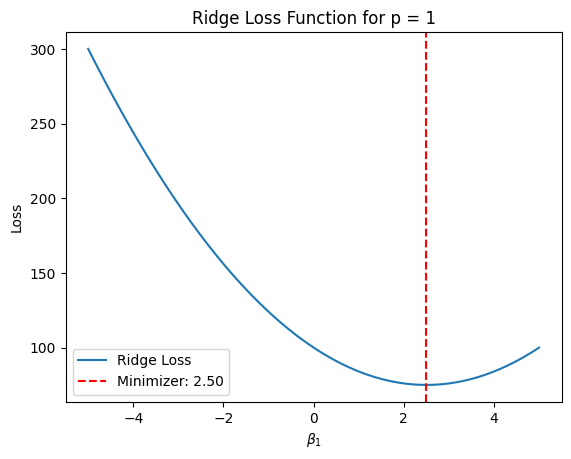

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
y1 = 10
lambda_ = 3
beta = np.linspace(-5, 5, 500)

# Ridge loss function
ridge_loss = (y1 - beta)**2 + lambda_ * beta**2

# Minimizer
minimizer = y1 / (1 + lambda_)

# Plot
fig, ax = plt.subplots()
ax.plot(beta, ridge_loss, label='Ridge Loss')
ax.axvline(minimizer, color='red', linestyle='--', label=f'Minimizer: {minimizer:.2f}')
ax.set_xlabel(r'$\beta_1$')
ax.set_ylabel('Loss')
ax.set_title('Ridge Loss Function for p = 1')
ax.legend()
plt.show()


**(b) Consider (6.13) with $p = 1$. For some choice of $y_1$ and $\lambda > 0$, plot (6.13) as a function of $\beta_1$. Your plot should confirm that (6.13) is solved by (6.15).**

The **lasso loss** is:

$$
L(\beta_1) = (y_1 - \beta_1)^2 + \lambda |\beta_1|
$$

This is **nondifferentiable at** $\beta_1 = 0$, because of the absolute value term. So we handle this in three regions:

**Case 1: $\beta_1 > 0$**

$|\beta_1| = \beta_1$, so the objective becomes:

$$
(y_1 - \beta_1)^2 + \lambda \beta_1
$$

Differentiate:

$$
-2(y_1 - \beta_1) + \lambda = 0 \quad \Rightarrow \quad -2y_1 + 2\beta_1 + \lambda = 0
\Rightarrow \beta_1 = y_1 - \frac{\lambda}{2}
$$

This only makes sense if $\beta_1 > 0 \Rightarrow y_1 > \lambda/2$

**Case 2: $\beta_1 < 0$**

$|\beta_1| = -\beta_1$, so the objective becomes:

$$
(y_1 - \beta_1)^2 - \lambda \beta_1
$$

Differentiate:

$$
-2(y_1 - \beta_1) - \lambda = 0 \quad \Rightarrow \quad -2y_1 + 2\beta_1 - \lambda = 0
\Rightarrow \beta_1 = y_1 + \frac{\lambda}{2}
$$

This only makes sense if $\beta_1 < 0 \Rightarrow y_1 < -\lambda/2$

**Case 3: $\beta_1 = 0$**

We check whether $\beta_1 = 0$ minimizes the function when $|y_1| \le \lambda/2$.

To do this, we examine the **subgradient** at $\beta_1 = 0$, since the derivative does not exist there.

The subdifferential of $|\beta_1|$ at $\beta_1 = 0$ is the interval $[-1, 1]$, so:

$$
\frac{dL}{d\beta_1} = -2(y_1 - 0) + \lambda z, \quad \text{where } z \in [-1, 1]
$$

Set to zero:

$$
-2y_1 + \lambda z = 0 \Rightarrow z = \frac{2y_1}{\lambda}
$$

For this to hold with $z \in [-1, 1]$, it must be that:

$$
\left| \frac{2y_1}{\lambda} \right| \le 1 \Rightarrow |y_1| \le \frac{\lambda}{2}
$$

So, $\hat{\beta}_1 = 0$ is optimal in this range.


$$
\hat{\beta}_1 =
\begin{cases}
y_1 - \lambda/2 & \text{if } y_1 > \lambda/2 \\
0 & \text{if } |y_1| \le \lambda/2 \\
y_1 + \lambda/2 & \text{if } y_1 < -\lambda/2
\end{cases}
$$

This is known as the **soft-thresholding rule** — it shrinks coefficients toward zero, and sets them to zero if they're not large enough in absolute value.

Let's prove it with a plot.

#### Case $y_1 > \lambda/2$

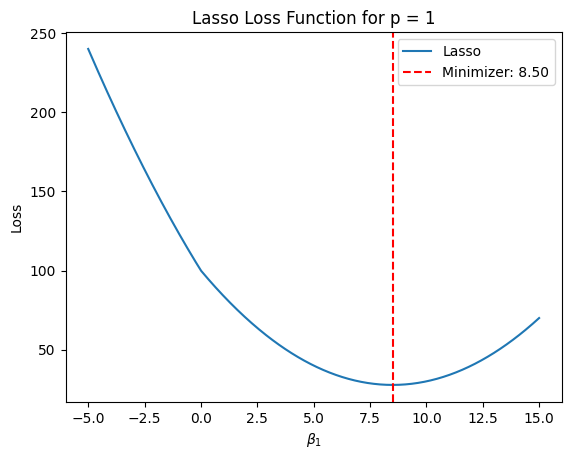

In [14]:
# Parameters
y1 = 10
lambda_ = 3
beta = np.linspace(-5, 15, 500)

# Ridge loss function
ridge_loss = (y1 - beta)**2 + lambda_ * abs(beta)

# Minimizer
minimizer = y1 - lambda_ / 2

# Plot
fig, ax = plt.subplots()
ax.plot(beta, ridge_loss, label='Lasso')
ax.axvline(minimizer, color='red', linestyle='--', label=f'Minimizer: {minimizer:.2f}')
ax.set_xlabel(r'$\beta_1$')
ax.set_ylabel('Loss')
ax.set_title('Lasso Loss Function for p = 1')
ax.legend()
plt.show()


#### Case $y_1 < -\lambda/2$

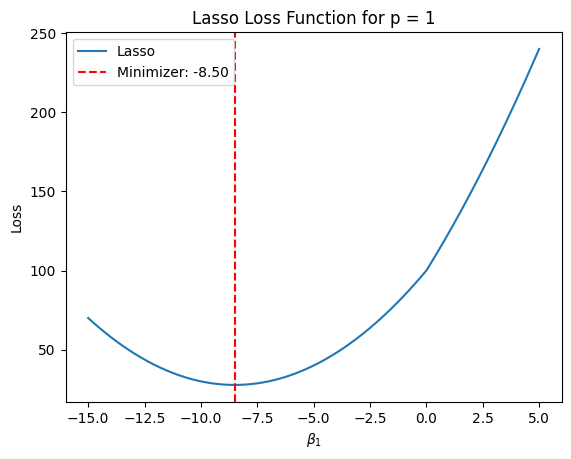

In [16]:
# Parameters
y1 = -10
lambda_ = 3
beta = np.linspace(-15, 5, 500)

# Ridge loss function
ridge_loss = (y1 - beta)**2 + lambda_ * abs(beta)

# Minimizer
minimizer = y1 + lambda_ / 2

# Plot
fig, ax = plt.subplots()
ax.plot(beta, ridge_loss, label='Lasso')
ax.axvline(minimizer, color='red', linestyle='--', label=f'Minimizer: {minimizer:.2f}')
ax.set_xlabel(r'$\beta_1$')
ax.set_ylabel('Loss')
ax.set_title('Lasso Loss Function for p = 1')
ax.legend()
plt.show()


#### Case $|y_1| \le \lambda/2$

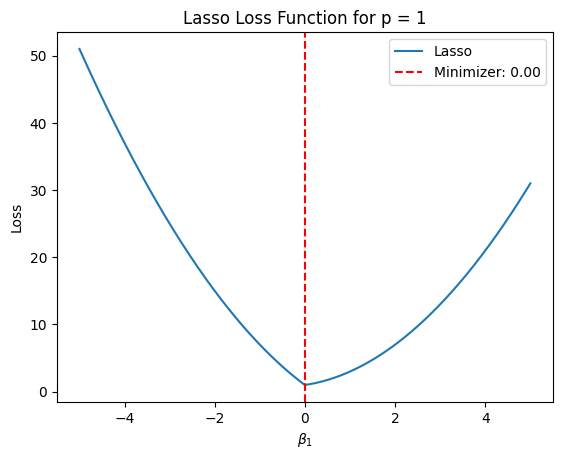

In [17]:
# Parameters
y1 = 1
lambda_ = 3
beta = np.linspace(-5, 5, 500)

# Ridge loss function
ridge_loss = (y1 - beta)**2 + lambda_ * abs(beta)

# Minimizer
minimizer = 0

# Plot
fig, ax = plt.subplots()
ax.plot(beta, ridge_loss, label='Lasso')
ax.axvline(minimizer, color='red', linestyle='--', label=f'Minimizer: {minimizer:.2f}')
ax.set_xlabel(r'$\beta_1$')
ax.set_ylabel('Loss')
ax.set_title('Lasso Loss Function for p = 1')
ax.legend()
plt.show()

**7. We will now derive the Bayesian connection to the lasso and ridge regression discussed in Section 6.2.2.**

**(a) Suppose that $y_i = \beta_0 +\sum_{j=1}^p x_{ij} \beta_j + \epsilon_i$ where $\epsilon_1$, ..., $\epsilon_n$ are independent and identically distributed from a $N(0, \sigma^2)$ distribution. Write out the likelihood for the data.**

Given:

$$
y_i = \beta_0 + \sum_{j=1}^p x_{ij} \beta_j + \epsilon_i,\quad \epsilon_i \sim \mathcal{N}(0, \sigma^2)
$$

Each observation:

$$
y_i \mid \mathbf{x}_i, \beta_0, \boldsymbol{\beta}, \sigma^2 \sim \mathcal{N}(\mu_i = \beta_0 + \mathbf{x}_i^\top \boldsymbol{\beta}, \sigma^2)
$$

So the **likelihood** is:

$$
L(\beta_0, \boldsymbol{\beta}) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{1}{2\sigma^2}(y_i - \beta_0 - \mathbf{x}_i^\top \boldsymbol{\beta})^2 \right)
$$

Compactly:

$$
f(\mathbf{Y} \mid \mathbf{X}, \beta_0, \boldsymbol{\beta}, \sigma^2)
= \frac{1}{(2\pi \sigma^2)^{n/2}} \exp\left( -\frac{1}{2\sigma^2} \| \mathbf{Y} - \beta_0 \mathbf{1} - \mathbf{X} \boldsymbol{\beta} \|^2 \right)
$$

**(b) Assume the following prior for $\beta$: $\beta_1$, ..., $\beta_p$ are independent and identically distributed according to a double-exponential distribution with mean 0 and common scale parameter b: i.e. $p(\beta) = \frac{1}{2b} \exp(−|\beta|/b)$. Write out the posterior for $\beta$ in this setting.**

Given:

* Prior: $\beta_j \sim \text{Laplace}(0, b)$, so:

  $$
  p(\beta_j) = \frac{1}{2b} \exp\left( -\frac{|\beta_j|}{b} \right)
  $$

Joint prior over $\boldsymbol{\beta}$ (i.i.d.):

$$
p(\boldsymbol{\beta}) = \prod_{j=1}^p \frac{1}{2b} \exp\left( -\frac{|\beta_j|}{b} \right)
$$

Then, the **unnormalized posterior**:

$$
p(\boldsymbol{\beta} \mid \mathbf{Y}, \mathbf{X}) \propto f(\mathbf{Y} \mid \mathbf{X}, \beta_0, \boldsymbol{\beta}) \cdot p(\boldsymbol{\beta})
$$

Ignoring constants:

$$
p(\boldsymbol{\beta} \mid \mathbf{Y}, \mathbf{X}) \propto \exp\left( -\frac{1}{2\sigma^2} \| \mathbf{Y} - \beta_0 \mathbf{1} - \mathbf{X} \boldsymbol{\beta} \|^2 - \frac{1}{b} \sum_{j=1}^p |\beta_j| \right)
$$

**(c) Argue that the lasso estimate is the mode for $\beta$ under this posterior distribution.**

The **MAP estimate** (maximum a posteriori) is the mode of the posterior.
Taking the negative log of the posterior in (b), we minimize:

$$
\frac{1}{2\sigma^2} \| \mathbf{Y} - \beta_0 \mathbf{1} - \mathbf{X} \boldsymbol{\beta} \|^2 + \frac{1}{b} \sum_{j=1}^p |\beta_j|
$$

This is exactly the **lasso loss** if we identify:

$$
\lambda = \frac{2\sigma^2}{b}
$$

So The lasso estimate is the mode of the posterior when the prior is Laplace.

**(d) Now assume the following prior for $\beta$: $\beta_1$, ..., $\beta_p$ are independent and identically distributed according to a normal distribution with mean zero and variance c. Write out the posterior for $\beta$ in this setting.**

Prior:

$$
\beta_j \sim \mathcal{N}(0, c^2) \quad \Rightarrow \quad p(\beta_j) = \frac{1}{\sqrt{2\pi c^2}} \exp\left( -\frac{\beta_j^2}{2c^2} \right)
$$

Joint prior:

$$
p(\boldsymbol{\beta}) = \prod_{j=1}^p \frac{1}{\sqrt{2\pi c^2}} \exp\left( -\frac{\beta_j^2}{2c^2} \right)
$$

Posterior (ignoring constants):

$$
p(\boldsymbol{\beta} \mid \mathbf{Y}, \mathbf{X}) \propto \exp\left( -\frac{1}{2\sigma^2} \| \mathbf{Y} - \beta_0 \mathbf{1} - \mathbf{X} \boldsymbol{\beta} \|^2 - \frac{1}{2c^2} \sum_{j=1}^p \beta_j^2 \right)
$$

**(e) Argue that the ridge regression estimate is both the mode and the mean for $\beta$ under this posterior distribution.**

This posterior is a product of Gaussians -> overall a **Gaussian distribution** in $\boldsymbol{\beta}$.

Since the posterior is Gaussian:

* Its **mode** (maximum) equals the **mean** (center)
* The MAP estimate = posterior mean

Minimizing the **negative log-posterior** gives:

$$
\arg\min_{\boldsymbol{\beta}} \left[ \frac{1}{2\sigma^2} \| \mathbf{Y} - \beta_0 \mathbf{1} - \mathbf{X} \boldsymbol{\beta} \|^2 + \frac{1}{2c^2} \sum_{j=1}^p \beta_j^2 \right]
$$

This is exactly **ridge regression**, with:

$$
\lambda = \frac{\sigma^2}{c^2}
$$